In [1]:
!wget 'https://figshare.com/ndownloader/articles/1512427/versions/5'

--2022-11-17 09:51:05--  https://figshare.com/ndownloader/articles/1512427/versions/5
Resolviendo figshare.com (figshare.com)... 34.250.174.243, 34.252.180.148, 2a05:d018:1f4:d000:27d5:cd4d:ba7c:be34, ...
Conectando con figshare.com (figshare.com)[34.250.174.243]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 879501695 (839M) [application/zip]
Guardando como: “5”

5                   100%[===================>] 838,76M  8,48MB/s    en 98s     

2022-11-17 09:52:44 (8,56 MB/s) - “5” guardado [879501695/879501695]



In [1]:
import zipfile
import glob
import os
import mat73
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [4]:
!mkdir data

In [5]:
with zipfile.ZipFile('./5', 'r') as zip_ref:
    zip_ref.extractall('./data/')

In [6]:
zip_paths = glob.glob('./data/*.zip')
zip_paths

['./data/brainTumorDataPublic_1533-2298.zip',
 './data/brainTumorDataPublic_767-1532.zip',
 './data/brainTumorDataPublic_2299-3064.zip',
 './data/brainTumorDataPublic_1-766.zip']

In [7]:
os.mkdir('./data/matData')
os.mkdir('./data/label1')
os.mkdir('./data/label2')
os.mkdir('./data/label3')

In [8]:
for zip_path in zip_paths:
    split_path = zip_path.split('/')[-1][:-4]
    os.mkdir(f'./data/matData/{split_path}')
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(f'./data/matData/{split_path}')
    os.remove(zip_path)

In [9]:
os.listdir('./data/matData/')

['brainTumorDataPublic_1533-2298',
 'brainTumorDataPublic_767-1532',
 'brainTumorDataPublic_1-766',
 'brainTumorDataPublic_2299-3064']

In [10]:
dir_paths = os.listdir('./data/matData/')

In [11]:
for n_folder, dir_path in enumerate(dir_paths):
    mat_imgs = glob.glob(f'./data/matData/{dir_path}/*.mat')
    for mat_img in mat_imgs:
        data_dict = mat73.loadmat(mat_img)
        splt = mat_img.split('/')[-1]
        if data_dict['cjdata']['label'] == 1:
            os.rename(mat_img,f'./data/label1/_{n_folder}{splt}')
        elif data_dict['cjdata']['label'] == 2:
            os.rename(mat_img,f'./data/label2/_{n_folder}{splt}')
        else:
            os.rename(mat_img,f'./data/label3/_{n_folder}{splt}')

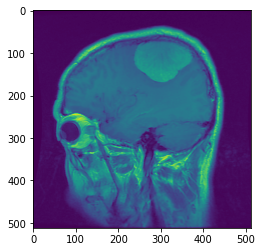

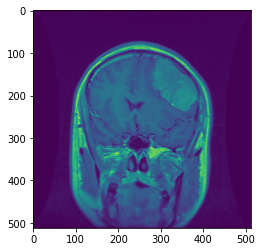

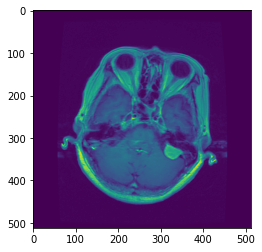

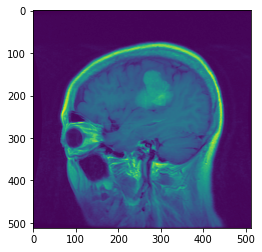

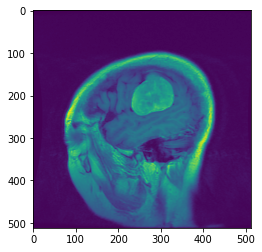

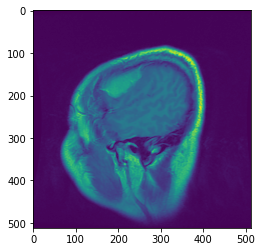

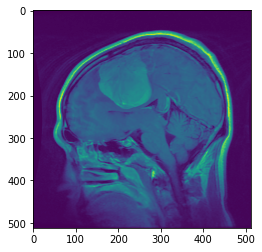

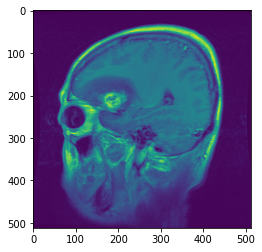

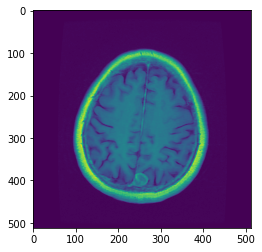

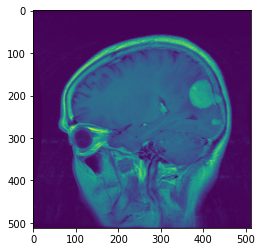

In [4]:
for i in glob.glob('./matData/label1/*mat')[:10]:
  data_dict = mat73.loadmat(i)
  img = data_dict['cjdata']['image']
  plt.imshow(img)
  plt.show()

In [2]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)


In [7]:
img = cv2.imread('./data/custom/matData/masked_imgs/label1_21.mat.png')
img.shape

(512, 512, 3)

In [8]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray.shape

(512, 512)

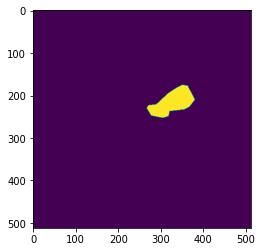

In [9]:
thresh = 10
im_bw = cv2.threshold(img_gray, thresh, 255, cv2.THRESH_BINARY)[1]
plt.imshow(im_bw)

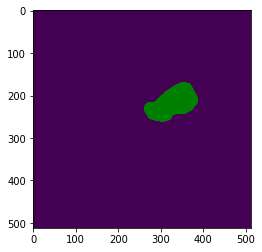

In [17]:
X = []
Y = []
plt.imshow(im_bw)
for i in range(0,512):
    for j in range(0,512):
        if im_bw[i,j] == 255:
            X.append(j)
            Y.append(i)
            plt.plot(j,i,'og')
X = np.array(X, dtype=np.float32)
Y = np.array(Y, dtype=np.float32)

In [21]:
X.T

array([349., 350., 351., ..., 304., 305., 306.], dtype=float32)

In [22]:
XX = np.concatenate((X.reshape(-1,1),Y.reshape(-1,1)), axis=1)
XX

array([[349., 176.],
       [350., 176.],
       [351., 176.],
       ...,
       [304., 252.],
       [305., 252.],
       [306., 252.]], dtype=float32)

In [23]:
pca.fit(XX)

PCA(n_components=2)

[327.55417 216.16022]
120.23180389404297
51.89937210083008


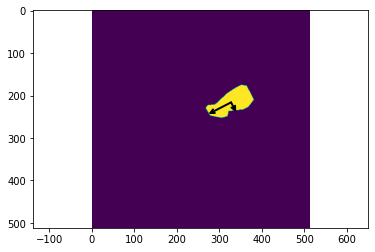

In [24]:
plt.imshow(im_bw)
print(pca.mean_)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    print(4*np.sqrt(length))
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');